In [137]:
import pandas as pd
import altair as alt


dades = pd.read_msgpack("data/processat.msg")

dades.head()

,codi,cognoms_nom,cognoms,nom,sexe,edat,mun_naix,ped_naix,com_naix,prov_naix,...,indult,afusellades,ref_arxiu,descr,correccio,pena_cat,cat_naix,cat_res,af,af_cat
0,103990,"""AJOBLANCO"" (Revista) \r\n(per la publicació d...",NaN,AJOBLANCO\r\n(per la publicació de la historie...,--,0.0,--,--,--,--,...,NaN,NaN,105526.0,ANC 2017 07 12,NaN,8.0,i,?,False,False
1,144537,"""AURORA, La"" (revista del PORE)",NaN,LA AURORA,--,0.0,--,--,--,--,...,NaN,NaN,104676.0,ANC 2017 07 12,NaN,8.0,i,?,False,False
2,143742,"""BRAVOS, LOS""",NaN,LOS BRAVOS,--,0.0,--,--,--,--,...,NaN,NaN,96807.0,ANC 2017 07 12,NaN,8.0,i,?,False,False
3,134935,"""CENTRO DE DEPORTES VILLANUEVA""",NaN,CENTRO DE DEPORTES VILLANUEVA,--,0.0,--,--,--,--,...,NaN,NaN,43298.0,ANC 2017 07 12,NaN,8.0,i,?,False,False
4,144051,"""COOPERATIVA AGROPECUARIA DE GUISSONA. CASA RU...",NaN,COOPERATIVA AGROPECUARIA DE GUISSONA CASA RURA...,--,0.0,--,--,--,--,...,NaN,NaN,98248.0,ANC 2017 07 12,NaN,8.0,i,?,False,False


## Execucions

Hi van haver un total de 3362 execucions ordrenades per l’Autoritat Militar entre 1939 i 1975, de les quals la gran majoria (1 de cada 8, o 2892) va tenir lloc l’any 1939.



In [139]:
pena_de_mort = dades.query("pena_cat ==1").groupby(["af_cat","sexe"])["codi"].count().unstack("sexe")

pena_de_mort["sum"]=pena_de_mort.sum(axis=1)

pena_de_mort


sexe,Dona,Home,sum
af_cat,,,
False,24,1031,1055
True,17,3345,3362


In [140]:
pena_de_mort_anys = dades.query("pena_cat == 1.0").\
    groupby(["af_cat","sexe",pd.Grouper(key="any_inicial",freq="1y")])["any_inicial"].\
    count().\
    rename(columns={ 'sexe' : 'penes de mort' }).\
    unstack("sexe").\
    unstack("af_cat").\
    fillna(" ")

pena_de_mort_anys

sexe         Dona        Home      
af_cat      False True  False True 
any_inicial                        
1937-12-31                  1     1
1938-12-31      4          43   103
1939-12-31     18    16   732  2876
1940-12-31      1     1    98   202
1941-12-31                 41    45
1942-12-31      1          32    31
1943-12-31                 19    19
1944-12-31                 10    12
1945-12-31                 20    17
1946-12-31                 10     5
1947-12-31                  4     5
1948-12-31                  2     3
1949-12-31                  7    10
1950-12-31                        3
1951-12-31                  1     3
1953-12-31                  1      
1954-12-31                        1
1955-12-31                  2      
1956-12-31                  3      
1960-12-31                  1      
1967-12-31                  2      
1972-12-31                        1
1973-12-31                        1
1975-12-31                        1

## Dones represaliades

Tres de cada quatre dones van patir repressió durant 1939 (aprox. 4109 del total de represaliades).

In [141]:
pd.Series({"y==1939" : dades.query("sexe == 'Dona' and any_inicial=='1939-12-31'")["pena"].count(),

              "y<>1940"  : dades.query("sexe == 'Dona' and any_inicial!='1939-12-31'")["pena"].count() })




y<>1940    1393
y==1939    4109
dtype: int64

### Les més joves

Nenes de catorze o quinze anys van ser submetidas a sumaríssimos. La més jove condemnada va ser María Angustias Mateos Fernandez, de 17 anys, condemnada a a cinc anys de presó en 1973. El cas de María Angustias va ser un dels deu sumaríssimos d'aquest any.

In [166]:
dades.query("sexe == 'Dona' and edat < 17").sort_values("edat").iloc[:,[1,5,21,22,23,24]]

,cognoms_nom,edat,any_inicial,any_resol,pena,indult
53291,"RIAU ORTIZ, Antonia",13.0,1938-12-31,1938-12-31,Llibertat,NaN
64147,"TOBELLA MOLINA, Juanita",14.0,1939-12-31,1939-12-31,Llibertat,NaN
20294,"ESCRIBANO GIL, Juana",14.0,1939-12-31,1939-12-31,Sense declaració de responsabilitats,NaN
15125,"CITOLER DELGADO, Maria",14.0,1938-12-31,NaT,Sobreseïment,NaN
44967,"OLLÉ SOLÉ, Natividad",14.0,1944-12-31,1945-12-31,Sense declaració de responsabilitats,NaN
764,"AIXENDRÍ BARBERÀ, Francisca",14.0,1940-12-31,1940-12-31,Sobreseïment,NaN
6286,"BATISTA MOTOS, Enriqueta",14.0,1939-12-31,NaT,Sobreseïment,NaN
62530,"SOLER RIBAS, Rosa",15.0,1939-12-31,1939-12-31,Sobreseïment,NaN
42061,"MONTOLIU TORRUELLA, Ángela",15.0,1939-12-31,1939-12-31,Llibertat,NaN
62531,"SOLER RIBAS, Rosa",15.0,1939-12-31,1939-12-31,"Pena de multa, remissió o a disposició d'altre...",NaN


## Les més velles

Antonia Castan Viu fue condenada a 30 anos de cárcel cuando ella tenia 79 anos de edad - una pena que luego fue conmutada a 12 anos. Este es uno de los pocos casos que datan de 1938 o 1937, lo que significa que el sumaríssimo fue inciado por las autoridades de la República.

In [171]:
dades.query("sexe == 'Dona' and edat > 75 and edat<9999").sort_values("edat",ascending=False).iloc[:,[1,5,21,22,23,24]]

,cognoms_nom,edat,any_inicial,any_resol,pena,indult
66666,"VALVERDE SAUQUILLO, Dorotea",89.0,1939-12-31,1939-12-31,Llibertat,NaN
6393,"BAULÓ CEUMA, Josefa",79.0,1939-12-31,1939-12-31,Absolt,NaN
13703,"CASTAN VIU, Antonia",79.0,1938-12-31,1938-12-31,Trenta anys de reclusió major,Dotze anys de presó major
13890,"CASTELLNOU PENA, María",79.0,1938-12-31,1943-12-31,Sobreseïment,NaN
25755,"GARCÍA ARASA, Teresa",78.0,1939-12-31,1939-12-31,Sobreseïment,NaN
45361,"ORTEGA MERCADER, Francisca",78.0,1939-12-31,1939-12-31,Absolt,NaN
50102,"PONTE HERNÁNDEZ, Carmen",78.0,1939-12-31,1939-12-31,Sense declaració de responsabilitats,NaN
29346,"GONZALO ESTEBAN, Manuela",77.0,1939-12-31,1939-12-31,Dos mesos d'arrest major,NaN
59032,"SANCHO FIBLA, Rosa",77.0,1938-12-31,1939-12-31,Llibertat,NaN
62576,"SOLER SOLVES, María de las Nieves",77.0,1940-12-31,1940-12-31,Sense declaració de responsabilitats,NaN


### El porcentaje de mujeres

La inmensa mayoría de los acusados en los sumarísimos fueron hombres. Sóloen los añoss 60 y 70, cuando sumaríssimos están prácticamente en desuso, hay episodios donde la proporción de mujeres respecto a todos los acusados supera los 10% 

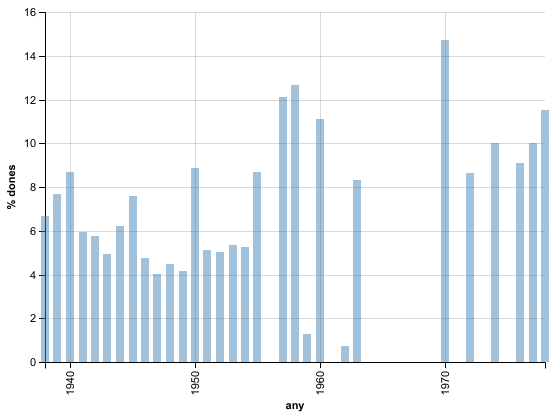

In [172]:
anys = dades.groupby(["sexe","any_inicial"])["nom"].count().unstack("sexe").reset_index()
anys["perc_dones"]=100*anys["Dona"]/(anys["Dona"]+anys["Home"])


alt.Chart(anys).mark_bar(barThinSize=8,opacity=0.5).encode(alt.X("any_inicial",
                                                                 scale=alt.Scale(),
                                            axis=alt.Axis(title="any",format="%Y")
                            ),
                       alt.Y("perc_dones",axis=alt.Axis(title="% dones"))
                      )
                        

In [ ]:
## Un punto por caso

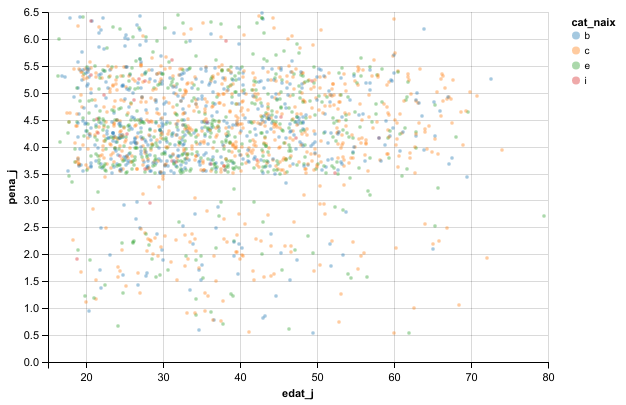

In [183]:
pd.options.mode.chained_assignment = None 



import random
dones = dades.query("sexe == 'Dona' and pena_cat < 7")

dones["edat_j"]=dones.loc[:,"edat"].apply(lambda a: a+(-0.5+random.random()))
dones["pena_j"]=dones.loc[:,"pena_cat"].apply(lambda a: (a+1*(-0.5+random.random())))



alt.Chart(dones.query("pena_cat < 8 & edat < 9999")).\
         mark_circle(size=10, opacity=0.4, color="red").\
         encode(alt.X("edat_j",scale=alt.Scale(zero=False)),
                y="pena_j",
                color="cat_naix")

## Anys i penes



In [184]:
def pena_cat(a) :
    if a == 1 :
        return "mort"
    elif a < 5:
        return ">12a"
    elif a < 8:
        return "0-12a"
    elif a == 8.0 :
        return "sense pena"
    else:
        return "altres"
    
dades["p"] = dades["pena_cat"].apply(pena_cat)

anys_penes = dades.query("sexe != '--'").groupby(["p","any_inicial","sexe"])["pena"].\
             count().\
             unstack("p")
    
anys_perc = anys_penes.div(anys_penes.sum(axis=1),axis=0).\
             fillna(' ').rename(columns={
      1.0 : "mort",
      2.0 : ">30a",
      3.0 : "20a-30a",
      4.0 : "12a-20a",
      5.0 : "6a-12a",
      6.0 : "6m-6a",
      7.0 : "<6m",
      8.0 : "sense pena",
      9.0 :  "altres" 
      })
    
anys_penes

p                  0-12a     >12a  altres    mort  sense pena
any_inicial sexe                                             
1936-12-31  Home     NaN      NaN     NaN     NaN         1.0
1937-12-31  Dona     NaN      1.0     1.0     NaN         NaN
            Home     NaN      5.0     1.0     2.0        20.0
1938-12-31  Dona    50.0     49.0    16.0     4.0       220.0
            Home   153.0    597.0   407.0   146.0      2765.0
1939-12-31  Dona   752.0    795.0   255.0    34.0      2273.0
            Home  3540.0  18104.0  2850.0  3608.0     15091.0
1940-12-31  Dona    54.0    134.0     8.0     2.0       314.0
            Home   434.0   3340.0   218.0   300.0      3791.0
1941-12-31  Dona    13.0     29.0     5.0     NaN       136.0
            Home    81.0    877.0    69.0    86.0      1886.0
1942-12-31  Dona     3.0      9.0     4.0     1.0        56.0
            Home    31.0    276.0    49.0    63.0       984.0
1943-12-31  Dona     3.0      2.0     NaN     NaN        38.0
            Home    23.0     68.0    30.0    38.0       490.0
1944-12-31  Dona     9.0      3.0     2.0     NaN        53.0
            Home   106.0     97.0    76.0    22.0       515.0
1945-12-31  Dona     5.0      1.0     1.0     NaN        22.0
            Home    35.0     93.0    49.0    37.0       368.0
1946-12-31  Dona     3.0      NaN     1.0     NaN        13.0
            Home    69.0     64.0    92.0    15.0       164.0
1947-12-31  Dona     6.0      NaN     2.0     NaN        11.0
            Home    65.0     43.0    87.0     9.0       202.0
1948-12-31  Dona     1.0      NaN     NaN     NaN         8.0
            Home    29.0     19.0    61.0     5.0        94.0
1949-12-31  Dona    11.0      1.0     1.0     NaN        13.0
            Home    42.0     34.0    60.0    17.0       114.0
1950-12-31  Dona     2.0      NaN     1.0     NaN         4.0
            Home    12.0     10.0    20.0     3.0        85.0
1951-12-31  Dona     1.0      1.0     NaN     NaN         4.0
...                  ...      ...     ...     ...         ...
1958-12-31  Home    12.0      2.0    12.0     NaN        50.0
1959-12-31  Dona     NaN      NaN     NaN     NaN         1.0
            Home     1.0      NaN     2.0     NaN         5.0
1960-12-31  Home     7.0      2.0    23.0     1.0         8.0
1961-12-31  Dona     NaN      NaN     NaN     NaN         1.0
            Home    26.0      NaN    85.0     NaN        26.0
1962-12-31  Dona     1.0      NaN     2.0     NaN         NaN
            Home     8.0      2.0    14.0     NaN         9.0
1963-12-31  Home     NaN      NaN     1.0     NaN         3.0
1964-12-31  Home     1.0      NaN     NaN     NaN         2.0
1965-12-31  Home     NaN      NaN     1.0     NaN         3.0
1966-12-31  Home     NaN      NaN     1.0     NaN         NaN
1967-12-31  Home     NaN      NaN     NaN     2.0         4.0
1968-12-31  Home     NaN      4.0     2.0     NaN         4.0
1969-12-31  Dona     1.0      NaN     4.0     NaN         5.0
            Home     7.0      NaN    30.0     NaN        21.0
1970-12-31  Home     3.0      NaN     4.0     NaN         1.0
1971-12-31  Dona     NaN      NaN     5.0     NaN         NaN
            Home     2.0      NaN    47.0     NaN         4.0
1972-12-31  Home     NaN      2.0     7.0     1.0         NaN
1973-12-31  Dona     1.0      NaN     NaN     NaN         NaN
            Home     3.0      2.0     3.0     1.0         NaN
1974-12-31  Home     NaN      NaN     NaN     NaN         4.0
1975-12-31  Dona     NaN      NaN     NaN     NaN         1.0
            Home     2.0      NaN     2.0     1.0         5.0
1976-12-31  Dona     NaN      NaN     2.0     NaN         1.0
            Home     1.0      NaN     8.0     NaN        18.0
1977-12-31  Dona     4.0      NaN     NaN     NaN         2.0
            Home    17.0      NaN     4.0     NaN        25.0
1978-12-31  Home     1.0      NaN     2.0     NaN        32.0

[73 rows x 5 columns]